In [36]:
import numpy as np
import pandas as pd
from data_loader import (
    get_index_tickers, 
    download_returns, 
    get_all_datasets,
    DATASETS

)
from optimization import run_optimization
from visualization import (
    generate_comparison_table, 
    print_latex_table, 
    print_summary,
    plot_comparison_bar_chart,
    plot_heatmap_2d,
    plot_heatmap_3d_slices,
    generate_paper_tables
)


# Configuration
CONFIG = {
    # Data settings
    'num_stocks': 100,
    'random_sample': True,
    'random_seed': 42,
    'start_date': '2020-01-01',
    'end_date': None,
    
    # Optimization settings
    'N_train': 200,
    'grid_size': 11,
    
    # Paper replication: run all datasets and frequencies
    'datasets': ['sp500', 'nasdaq100', 'nikkei225', 'nifty50', 'bse_sensex', 'ftse100'],
    'frequencies': [30, 60, 90],  # Rebalancing frequencies (days)
}

# Display names for datasets
DATASET_DISPLAY_NAMES = {
    'sp500': 'S&P',
    'nasdaq100': 'NASDAQ',
    'nikkei225': 'NIKKEI',
    'nifty50': 'NSE',
    'bse_sensex': 'BSE',
    'ftse100': 'FTSE',
}


def run_single_experiment(returns, dataset_name, frequency, grid_size=11, N_train=200):
    """Run optimization for a single dataset and frequency."""
    results = run_optimization(
        returns,
        N_train=N_train,
        N_test=frequency,
        rebalance_freq=frequency,
        grid_size=grid_size,
        verbose=False
    )
    return results


def run_paper_replication(config):
    """
    Run full paper replication: all datasets × all frequencies.
    
    Returns:
        all_results: Dict of {(dataset, freq): results}
    """
    print("\n" + "="*70)
    print("PAPER REPLICATION: Running all datasets and frequencies")
    print("="*70)
    print(f"Datasets: {config['datasets']}")
    print(f"Frequencies: {config['frequencies']} days")
    print("="*70 + "\n")
    
    all_results = {}
    
    for dataset in config['datasets']:
        print(f"\n{'='*50}")
        print(f"Loading {DATASET_DISPLAY_NAMES.get(dataset, dataset)} data...")
        print(f"{'='*50}")
        
        try:
            # Get tickers for this dataset
            tickers = get_index_tickers(
                dataset,
                num_stocks=config['num_stocks'],
                random_sample=config['random_sample'],
                seed=config['random_seed']
            )
            
            # Download returns
            returns = download_returns(
                tickers,
                start_date=config['start_date'],
                end_date=config['end_date'],
                verbose=True
            )
            
            if len(returns) == 0 or len(returns.columns) < 10:
                print(f"  Insufficient data for {dataset}, skipping...")
                continue
                
            print(f"  Dataset: {len(returns.columns)} assets, {len(returns)} trading days")
            
            # Run for each frequency
            for freq in config['frequencies']:
                print(f"\n  Running {freq}-day rebalancing...")
                
                results = run_single_experiment(
                    returns, 
                    dataset, 
                    freq, 
                    grid_size=config['grid_size'],
                    N_train=config['N_train']
                )
                
                all_results[(dataset, freq)] = results
                
                # Quick summary
                if results.get('our_3d_method', {}).get('avg_variance') is not None:
                    vol = np.sqrt(results['our_3d_method']['avg_variance'] * 252) * 100
                    print(f"    Our 3D: {vol:.3f}%")
                    
        except Exception as e:
            print(f"  Error processing {dataset}: {e}")
            import traceback
            traceback.print_exc()
            continue
    
    return all_results


config = CONFIG
    
# Run paper replication
all_results = run_paper_replication(config)



PAPER REPLICATION: Running all datasets and frequencies
Datasets: ['sp500', 'nasdaq100', 'nikkei225', 'nifty50', 'bse_sensex', 'ftse100']
Frequencies: [30, 60, 90] days


Loading S&P data...


[*********************100%***********************]  100 of 100 completed

Successfully loaded: 89 assets, 1499 days
Returns shape: (1498, 89)
Date range: 2020-01-03 00:00:00 to 2025-12-17 00:00:00
  Dataset: 89 assets, 1498 trading days

  Running 30-day rebalancing...


    Our 3D: 12.578%

  Running 60-day rebalancing...
    Our 3D: 12.833%

  Running 90-day rebalancing...
    Our 3D: 12.959%

Loading NASDAQ data...


[*********************100%***********************]  100 of 100 completed


Successfully loaded: 86 assets, 1499 days
Returns shape: (1498, 86)
Date range: 2020-01-03 00:00:00 to 2025-12-17 00:00:00
  Dataset: 86 assets, 1498 trading days

  Running 30-day rebalancing...
    Our 3D: 12.387%

  Running 60-day rebalancing...
    Our 3D: 12.828%

  Running 90-day rebalancing...
    Our 3D: 12.875%

Loading NIKKEI data...


[*********************100%***********************]  99 of 99 completed

2 Failed downloads:
['9613.T', '9062.T']: YFTzMissingError('possibly delisted; no timezone found')


Successfully loaded: 96 assets, 1456 days
Returns shape: (1455, 96)
Date range: 2020-01-07 00:00:00 to 2025-12-17 00:00:00
  Dataset: 96 assets, 1455 trading days

  Running 30-day rebalancing...
    Our 3D: 13.679%

  Running 60-day rebalancing...
    Our 3D: 13.938%

  Running 90-day rebalancing...
    Our 3D: 14.057%

Loading NSE data...


[*********************100%***********************]  50 of 50 completed

Successfully loaded: 49 assets, 1479 days
Returns shape: (1478, 49)
Date range: 2020-01-02 00:00:00 to 2025-12-17 00:00:00
  Dataset: 49 assets, 1478 trading days

  Running 30-day rebalancing...


    Our 3D: 11.333%

  Running 60-day rebalancing...
    Our 3D: 11.460%

  Running 90-day rebalancing...
    Our 3D: 11.635%

Loading BSE data...


[*********************100%***********************]  30 of 30 completed


Successfully loaded: 4 assets, 1478 days
Returns shape: (1477, 4)
Date range: 2020-01-02 00:00:00 to 2025-12-17 00:00:00
  Insufficient data for bse_sensex, skipping...

Loading FTSE data...


[*********************100%***********************]  98 of 98 completed

8 Failed downloads:
['ICP.L', 'DARK.L', 'POLY.L', 'MGGT.L', 'VMUK.L', 'AVV.L', 'BDEV.L', 'SMDS.L']: YFTzMissingError('possibly delisted; no timezone found')


Successfully loaded: 76 assets, 1507 days
Returns shape: (1506, 76)
Date range: 2020-01-03 00:00:00 to 2025-12-17 00:00:00
  Dataset: 76 assets, 1506 trading days

  Running 30-day rebalancing...
    Our 3D: 10.757%

  Running 60-day rebalancing...
    Our 3D: 10.922%

  Running 90-day rebalancing...
    Our 3D: 11.125%


In [37]:
# Generate paper-style tables
print("\n" + "="*70)
print("RESULTS TABLES (Paper Format)")
print("="*70)
    
generate_paper_tables(all_results, config['frequencies'])
    
# Generate detailed results for each dataset/frequency
for (dataset, freq), results in all_results.items():
    print(f"\n{'='*70}")
    print(f"Detailed Results: {DATASET_DISPLAY_NAMES.get(dataset, dataset)} - {freq} days")
    print(f"{'='*70}")
    
    table = generate_comparison_table(results)
    print(table.to_string(index=False))


RESULTS TABLES (Paper Format)

TABLE I: Annualized Volatility (%) - NSE, NIKKEI, S&P
    Estimator NSE (30d) NIKKEI (30d) S&P (30d) NSE (60d) NIKKEI (60d) S&P (60d) NSE (90d) NIKKEI (90d) S&P (90d)
   Σ_Identity     13.74        18.88     16.35     13.81        19.05     16.50     13.96        19.23     16.69
     Σ_Scaled     13.74        18.89     16.34     13.81        19.07     16.49     13.96        19.26     16.68
        Σ_SCM     11.56        13.74     12.97     11.78        14.03     13.11     11.93        14.25     13.37
     Σ_Target     12.35        17.65     16.30     12.44        17.89     16.89     12.57        17.22     16.31
         Σ_MP     11.47        13.91     12.95     11.63        14.14     13.15     11.81        14.31     13.51
      Σ_Tyler     11.48        13.79     12.62     11.63        14.08     12.91     11.78        14.16     12.99
Σ* (Paper 2D)     11.38        13.70     12.82     11.49        13.94     13.01     11.71        14.06     13.27
  Σ* (Our 

In [38]:
import matplotlib.pyplot as plt

# Dictionary to store all outputs
outputs = {
    'tables': {},
    'plots': {},
    'summary': {}
}

print("\n" + "="*70)
print("GENERATING ALL VISUALIZATIONS (CORRECTED)")
print("="*70)

# Generate visualizations for ALL dataset/frequency combinations (not just first)
for (dataset, freq), results in all_results.items():
    print(f"\n{'='*50}")
    print(f"Visualizing: {DATASET_DISPLAY_NAMES.get(dataset, dataset)} - {freq} days")
    print(f"{'='*50}")
    
    # Generate comparison table
    table = generate_comparison_table(results)
    outputs['tables'][(dataset, freq)] = table
    
    # 1. Bar chart comparison
    print("  Generating bar chart...")
    plt.figure(figsize=(12, 6))
    plot_comparison_bar_chart(table, save_path=f'comparison_{dataset}_{freq}d.png')
    plt.show()
    print(f"    ✓ Saved: comparison_{dataset}_{freq}d.png")
    
    # 2. 2D heatmap - FIXED: use 'dual_method_2d' not 'paper_2d'
    if results.get('dual_method_2d', {}).get('avg_performance') is not None:
        print("  Generating 2D heatmap...")
        plt.figure(figsize=(10, 8))
        plot_heatmap_2d(results, save_path=f'heatmap_2d_{dataset}_{freq}d.png')
        plt.show()
        print(f"    ✓ Saved: heatmap_2d_{dataset}_{freq}d.png")
    else:
        print("  ⚠ Skipping 2D heatmap (no avg_performance data)")
    
    # 3. 3D heatmap slices - FIXED: use 'our_3d_method' not 'our_3d'
    if results.get('our_3d_method', {}).get('avg_performance') is not None:
        print("  Generating 3D heatmap slices...")
        plt.figure(figsize=(15, 10))
        plot_heatmap_3d_slices(results, save_path=f'heatmap_3d_{dataset}_{freq}d.png')
        plt.show()
        print(f"    ✓ Saved: heatmap_3d_{dataset}_{freq}d.png")
    else:
        print("  ⚠ Skipping 3D heatmap (no avg_performance data)")

# Summary
print("\n" + "="*70)
print("VISUALIZATION SUMMARY")
print("="*70)
print(f"Total dataset × frequency combinations: {len(all_results)}")
print(f"Tables stored: {len(outputs['tables'])}")

# Count generated plots
import os
bar_charts = len([f for f in os.listdir('.') if f.startswith('comparison_') and f.endswith('.png')])
heatmap_2d = len([f for f in os.listdir('.') if f.startswith('heatmap_2d_') and f.endswith('.png')])
heatmap_3d = len([f for f in os.listdir('.') if f.startswith('heatmap_3d_') and f.endswith('.png')])

print(f"\nPlots generated:")
print(f"  Bar charts: {bar_charts}")
print(f"  2D heatmaps: {heatmap_2d}")
print(f"  3D heatmaps: {heatmap_3d}")
print(f"  Total plots: {bar_charts + heatmap_2d + heatmap_3d}")

# Store metadata
outputs['summary'] = {
    'total_combinations': len(all_results),
    'datasets': list(set([k[0] for k in all_results.keys()])),
    'frequencies': CONFIG['frequencies'],
    'plots_generated': {
        'bar_charts': bar_charts,
        'heatmaps_2d': heatmap_2d,
        'heatmaps_3d': heatmap_3d,
        'total': bar_charts + heatmap_2d + heatmap_3d
    }
}

print("\n✓ All outputs stored in 'outputs' dictionary")
print("  Access via: outputs['tables'], outputs['summary']")
print("="*70)


GENERATING ALL VISUALIZATIONS (CORRECTED)

Visualizing: S&P - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_sp500_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_sp500_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_sp500_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_sp500_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_sp500_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_sp500_30d.png

Visualizing: S&P - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_sp500_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_sp500_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_sp500_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_sp500_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_sp500_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_sp500_60d.png

Visualizing: S&P - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_sp500_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_sp500_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_sp500_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_sp500_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_sp500_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_sp500_90d.png

Visualizing: NASDAQ - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nasdaq100_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nasdaq100_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nasdaq100_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nasdaq100_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nasdaq100_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nasdaq100_30d.png

Visualizing: NASDAQ - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nasdaq100_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nasdaq100_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nasdaq100_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nasdaq100_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nasdaq100_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nasdaq100_60d.png

Visualizing: NASDAQ - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nasdaq100_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nasdaq100_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nasdaq100_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nasdaq100_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nasdaq100_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nasdaq100_90d.png

Visualizing: NIKKEI - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nikkei225_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nikkei225_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nikkei225_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nikkei225_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nikkei225_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nikkei225_30d.png

Visualizing: NIKKEI - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nikkei225_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nikkei225_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nikkei225_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nikkei225_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nikkei225_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nikkei225_60d.png

Visualizing: NIKKEI - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nikkei225_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nikkei225_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nikkei225_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nikkei225_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nikkei225_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nikkei225_90d.png

Visualizing: NSE - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nifty50_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nifty50_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nifty50_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nifty50_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nifty50_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nifty50_30d.png

Visualizing: NSE - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nifty50_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nifty50_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nifty50_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nifty50_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nifty50_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nifty50_60d.png

Visualizing: NSE - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_nifty50_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_nifty50_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_nifty50_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_nifty50_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_nifty50_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_nifty50_90d.png

Visualizing: FTSE - 30 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_ftse100_30d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_ftse100_30d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_ftse100_30d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_ftse100_30d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_ftse100_30d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_ftse100_30d.png

Visualizing: FTSE - 60 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_ftse100_60d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_ftse100_60d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_ftse100_60d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_ftse100_60d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_ftse100_60d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_ftse100_60d.png

Visualizing: FTSE - 90 days
  Generating bar chart...
✓ Comparison bar chart saved to: comparison_ftse100_90d.png


<Figure size 1200x600 with 0 Axes>

    ✓ Saved: comparison_ftse100_90d.png
  Generating 2D heatmap...
✓ 2D heatmap saved to: heatmap_2d_ftse100_90d.png


<Figure size 1000x800 with 0 Axes>

    ✓ Saved: heatmap_2d_ftse100_90d.png
  Generating 3D heatmap slices...
✓ 3D heatmap slices saved to: heatmap_3d_ftse100_90d.png


<Figure size 1500x1000 with 0 Axes>

    ✓ Saved: heatmap_3d_ftse100_90d.png

VISUALIZATION SUMMARY
Total dataset × frequency combinations: 15
Tables stored: 15

Plots generated:
  Bar charts: 15
  2D heatmaps: 15
  3D heatmaps: 15
  Total plots: 45

✓ All outputs stored in 'outputs' dictionary
  Access via: outputs['tables'], outputs['summary']


✓ Saved: estimator_weights.png


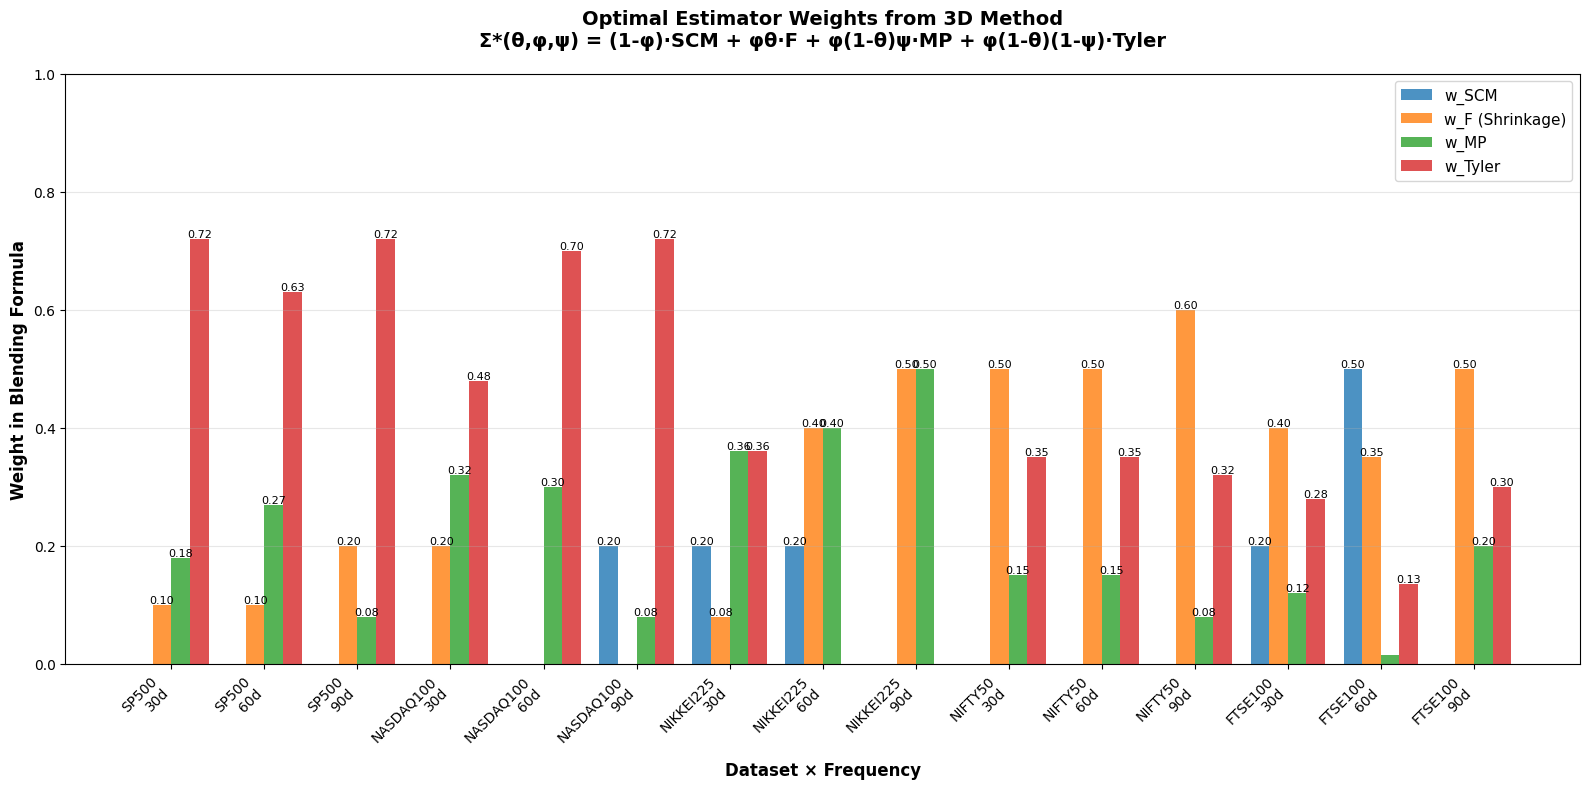


ESTIMATOR WEIGHTS TABLE
  Dataset Frequency  w_SCM  w_F  w_MP  w_Tyler   θ   φ   ψ
    SP500       30d    0.0 0.10 0.180    0.720 0.1 1.0 0.2
    SP500       60d    0.0 0.10 0.270    0.630 0.1 1.0 0.3
    SP500       90d    0.0 0.20 0.080    0.720 0.2 1.0 0.1
NASDAQ100       30d    0.0 0.20 0.320    0.480 0.2 1.0 0.4
NASDAQ100       60d    0.0 0.00 0.300    0.700 0.0 1.0 0.3
NASDAQ100       90d    0.2 0.00 0.080    0.720 0.0 0.8 0.1
NIKKEI225       30d    0.2 0.08 0.360    0.360 0.1 0.8 0.5
NIKKEI225       60d    0.2 0.40 0.400    0.000 0.5 0.8 1.0
NIKKEI225       90d    0.0 0.50 0.500    0.000 0.5 1.0 1.0
  NIFTY50       30d    0.0 0.50 0.150    0.350 0.5 1.0 0.3
  NIFTY50       60d    0.0 0.50 0.150    0.350 0.5 1.0 0.3
  NIFTY50       90d    0.0 0.60 0.080    0.320 0.6 1.0 0.2
  FTSE100       30d    0.2 0.40 0.120    0.280 0.5 0.8 0.3
  FTSE100       60d    0.5 0.35 0.015    0.135 0.7 0.5 0.1
  FTSE100       90d    0.0 0.50 0.200    0.300 0.5 1.0 0.4

Note: w_SCM + w_F + w_MP + w_T

In [39]:
def plot_estimator_weights(all_results, save_path=None):
    """
    Plot the optimal weights on each covariance estimator (SCM, F, MP, Tyler)
    from the 3D method hyperparameters.
    
    Weights derived from optimal (θ, φ, ψ):
        w_SCM = 1 - φ
        w_F = φ * θ
        w_MP = φ * (1 - θ) * ψ
        w_Tyler = φ * (1 - θ) * (1 - ψ)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    # Extract optimal parameters for each dataset/frequency
    data = []
    for (dataset, freq), results in all_results.items():
        if 'our_3d_method' in results:
            theta = results['our_3d_method'].get('theta_opt', 0)
            phi = results['our_3d_method'].get('phi_opt', 0)
            psi = results['our_3d_method'].get('psi_opt', 0)
            
            # Calculate weights
            w_SCM = 1 - phi
            w_F = phi * theta
            w_MP = phi * (1 - theta) * psi
            w_Tyler = phi * (1 - theta) * (1 - psi)
            
            data.append({
                'Dataset': dataset.upper(),
                'Frequency': f'{freq}d',
                'w_SCM': w_SCM,
                'w_F': w_F,
                'w_MP': w_MP,
                'w_Tyler': w_Tyler,
                'θ': theta,
                'φ': phi,
                'ψ': psi
            })
    
    df = pd.DataFrame(data)
    
    # Create grouped bar chart
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Group by dataset and frequency
    x = np.arange(len(df))
    width = 0.2
    
    bars1 = ax.bar(x - 1.5*width, df['w_SCM'], width, label='w_SCM', color='#1f77b4', alpha=0.8)
    bars2 = ax.bar(x - 0.5*width, df['w_F'], width, label='w_F (Shrinkage)', color='#ff7f0e', alpha=0.8)
    bars3 = ax.bar(x + 0.5*width, df['w_MP'], width, label='w_MP', color='#2ca02c', alpha=0.8)
    bars4 = ax.bar(x + 1.5*width, df['w_Tyler'], width, label='w_Tyler', color='#d62728', alpha=0.8)
    
    # Customize
    ax.set_xlabel('Dataset × Frequency', fontsize=12, fontweight='bold')
    ax.set_ylabel('Weight in Blending Formula', fontsize=12, fontweight='bold')
    ax.set_title('Optimal Estimator Weights from 3D Method\nΣ*(θ,φ,ψ) = (1-φ)·SCM + φθ·F + φ(1-θ)ψ·MP + φ(1-θ)(1-ψ)·Tyler', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels([f"{row['Dataset']}\n{row['Frequency']}" for _, row in df.iterrows()], 
                        rotation=45, ha='right')
    ax.legend(loc='upper right', fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, 1.0)
    
    # Add value labels on bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            if height > 0.02:  # Only label if weight > 2%
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}',
                       ha='center', va='bottom', fontsize=8)
    
    autolabel(bars1)
    autolabel(bars2)
    autolabel(bars3)
    autolabel(bars4)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {save_path}")
    
    plt.show()
    
    # Also print the table
    print("\n" + "="*80)
    print("ESTIMATOR WEIGHTS TABLE")
    print("="*80)
    display_df = df[['Dataset', 'Frequency', 'w_SCM', 'w_F', 'w_MP', 'w_Tyler', 'θ', 'φ', 'ψ']]
    print(display_df.to_string(index=False))
    print("\nNote: w_SCM + w_F + w_MP + w_Tyler = 1.0 for each row")
    
    # Verify sum = 1
    df['sum'] = df['w_SCM'] + df['w_F'] + df['w_MP'] + df['w_Tyler']
    print(f"\nVerification - all sums ≈ 1.0: {np.allclose(df['sum'], 1.0)}")
    
    return df



weights_df = plot_estimator_weights(all_results, save_path='estimator_weights.png')

In [40]:
import sys
import numpy as np
import pandas as pd
from synthetic_data import (
    generate_synthetic_returns,
    get_all_synthetic_datasets,
    print_synthetic_summary,
    SYNTHETIC_TYPES,
    SYNTHETIC_CONFIG
)
from optimization import run_optimization
from visualization import (
    generate_comparison_table, 
    print_latex_table,
    print_summary,
    plot_comparison_bar_chart,
    plot_heatmap_2d,
    plot_heatmap_3d_slices,
    generate_paper_tables,
    ESTIMATOR_ORDER
)


# Configuration for synthetic experiments
SYNTHETIC_EXPERIMENT_CONFIG = {
    # Data dimensions (matching real data scale)
    'N': 100,              # Number of assets
    'T': 1200,             # Observations (~5 years daily)
    
    # Optimization settings
    'N_train': 200,        # Training window (same as real data)
    'grid_size': 11,       # Grid search resolution
    'frequencies': [30, 60, 90],  # Rebalancing frequencies
    
    # Monte Carlo settings
    'n_seeds': 1,          # Number of random seeds for averaging
    'base_seed': 50,
}


def run_single_synthetic_experiment(returns, freq, grid_size=11, N_train=200, verbose=False):
    """Run optimization on a single synthetic dataset."""
    results = run_optimization(
        returns,
        N_train=N_train,
        N_test=freq,
        rebalance_freq=freq,
        grid_size=grid_size,
        verbose=verbose
    )
    return results


def run_synthetic_experiments(config, distributions=None, verbose=True):
    """
    Run experiments on synthetic data.
    
    Parameters:
        config: Experiment configuration dict
        distributions: List of distributions to test, or None for all
        verbose: Print progress
    
    Returns:
        all_results: Dict of {(distribution, freq, seed): results}
    """
    if distributions is None:
        distributions = list(SYNTHETIC_TYPES.keys())
    
    print("\n" + "="*70)
    print("SYNTHETIC DATA EXPERIMENTS")
    print("="*70)
    print(f"Distributions: {distributions}")
    print(f"Assets: {config['N']}, Observations: {config['T']}")
    print(f"Frequencies: {config['frequencies']} days")
    print(f"Seeds: {config['n_seeds']} (for Monte Carlo averaging)")
    print("="*70 + "\n")
    
    all_results = {}
    
    for dist in distributions:
        print(f"\n{'='*60}")
        print(f"Distribution: {SYNTHETIC_TYPES[dist]['name']}")
        print(f"{'='*60}")
        
        for seed_idx in range(config['n_seeds']):
            seed = config['base_seed'] + seed_idx
            
            # Generate synthetic data
            returns, true_cov, info = generate_synthetic_returns(
                distribution=dist,
                N=config['N'],
                T=config['T'],
                seed=seed
            )
            
            if seed_idx == 0 and verbose:
                print_synthetic_summary(returns, true_cov, info)
            
            # Run for each frequency
            for freq in config['frequencies']:
                if verbose:
                    print(f"  Seed {seed}, {freq}-day rebalancing...", end=' ')
                
                try:
                    results = run_single_synthetic_experiment(
                        returns, freq,
                        grid_size=config['grid_size'],
                        N_train=config['N_train'],
                        verbose=False
                    )
                    
                    # Store true covariance for PRIAL calculation
                    results['true_cov'] = true_cov
                    results['distribution'] = dist
                    results['seed'] = seed
                    
                    all_results[(dist, freq, seed)] = results
                    
                    if verbose:
                        vol = np.sqrt(results['our_3d_method']['avg_variance'] * 252) * 100
                        print(f"3D Vol: {vol:.2f}%")
                        
                except Exception as e:
                    print(f"Error: {e}")
                    continue
    
    return all_results


def generate_synthetic_visualizations(all_results, config, output_prefix='synthetic'):
    """
    Generate the same visualizations as real data for synthetic experiments.
    
    Parameters:
        all_results: Dict of {(distribution, freq, seed): results}
        config: Experiment configuration
        output_prefix: Prefix for output files
    """
    print("\n" + "="*70)
    print("GENERATING VISUALIZATIONS")
    print("="*70)
    
    # Group results by distribution
    distributions = sorted(list(set(dist for dist, _, _ in all_results.keys())))
    
    for dist in distributions:
        dist_name = SYNTHETIC_TYPES[dist]['name'].replace(' ', '_').replace('(', '').replace(')', '').replace('=', '')
        
        # Get first seed's results for each frequency (for detailed plots)
        for freq in config['frequencies']:
            key = (dist, freq, config['base_seed'])
            if key not in all_results:
                continue
            
            results = all_results[key]
            
            # Generate comparison table
            table = generate_comparison_table(results)
            
            # Generate bar chart
            save_path = f'{output_prefix}_{dist_name}_{freq}d_comparison.png'
            plot_comparison_bar_chart(table, save_path=save_path)
            
            # Generate 2D heatmap
            if results.get('dual_method_2d', {}).get('avg_performance') is not None:
                save_path = f'{output_prefix}_{dist_name}_{freq}d_heatmap_2d.png'
                plot_heatmap_2d(results, save_path=save_path)
            
            # Generate 3D heatmap slices
            if results.get('our_3d_method', {}).get('avg_performance') is not None:
                save_path = f'{output_prefix}_{dist_name}_{freq}d_heatmap_3d.png'
                plot_heatmap_3d_slices(results, save_path=save_path)


def generate_synthetic_paper_tables(all_results, config):
    """
    Generate paper-style tables for synthetic data (matching real data format).
    
    Rows: Estimators
    Columns: Distributions × Frequencies
    """
    distributions = sorted(list(set(dist for dist, _, _ in all_results.keys())))
    frequencies = config['frequencies']
    
    # Build table for each frequency
    for freq in frequencies:
        print(f"\n{'='*80}")
        print(f"TABLE: Annualized Volatility (%) - {freq}-day Rebalancing")
        print(f"{'='*80}")
        
        # Collect data for this frequency
        rows = []
        for estimator_key, estimator_display in ESTIMATOR_ORDER:
            row = {'Estimator': estimator_display}
            
            for dist in distributions:
                # Average across seeds
                vols = []
                for seed in range(config['base_seed'], config['base_seed'] + config['n_seeds']):
                    key = (dist, freq, seed)
                    if key not in all_results:
                        continue
                    
                    results = all_results[key]
                    
                    # Extract volatility for this estimator
                    if estimator_key in ['paper_2d', 'our_3d']:
                        if estimator_key == 'paper_2d':
                            data = results.get('dual_method_2d', {})
                        else:
                            data = results.get('our_3d_method', {})
                        if data.get('avg_variance') is not None:
                            vols.append(np.sqrt(data['avg_variance'] * 252) * 100)
                    else:
                        fixed = results.get('fixed_estimators', {})
                        if estimator_key in fixed:
                            var = fixed[estimator_key].get('avg_variance')
                            if var is not None:
                                vols.append(np.sqrt(var * 252) * 100)
                
                # Store mean ± std
                dist_short = SYNTHETIC_TYPES[dist]['name'].split()[0]  # First word
                if vols:
                    row[dist_short] = f"{np.mean(vols):.2f}"
                else:
                    row[dist_short] = '-'
            
            rows.append(row)
        
        df = pd.DataFrame(rows)
        print(df.to_string(index=False))
        
        # LaTeX version
        print("\n--- LaTeX ---")
        print(df.to_latex(index=False, escape=False))


def print_detailed_results_by_distribution(all_results, config):
    """Print detailed results for each distribution (like real data output)."""
    
    distributions = sorted(list(set(dist for dist, _, _ in all_results.keys())))
    
    for dist in distributions:
        print(f"\n{'='*80}")
        print(f"DETAILED RESULTS: {SYNTHETIC_TYPES[dist]['name']}")
        print(f"Description: {SYNTHETIC_TYPES[dist]['description']}")
        print(f"{'='*80}")
        
        for freq in config['frequencies']:
            # Use first seed for detailed table
            key = (dist, freq, config['base_seed'])
            if key not in all_results:
                continue
            
            results = all_results[key]
            
            print(f"\n--- {freq}-day Rebalancing (seed={config['base_seed']}) ---")
            table = generate_comparison_table(results)
            print(table.to_string(index=False))
            
            # Print optimal parameters
            ext_3d = results.get('our_3d_method', {})
            if ext_3d:
                print(f"\nOptimal 3D Parameters: θ={ext_3d.get('theta_opt', 'N/A'):.2f}, "
                      f"φ={ext_3d.get('phi_opt', 'N/A'):.2f}, ψ={ext_3d.get('psi_opt', 'N/A'):.2f}")


def aggregate_results(all_results, frequencies):
    """
    Aggregate results across seeds for each distribution/frequency.
    
    Returns:
        summary: DataFrame with mean and std of results
    """
    rows = []
    
    # Get unique distributions
    distributions = sorted(list(set(dist for dist, _, _ in all_results.keys())))
    
    for dist in distributions:
        for freq in frequencies:
            # Collect results for this dist/freq across seeds
            seed_results = {k: v for k, v in all_results.items() 
                          if k[0] == dist and k[1] == freq}
            
            if not seed_results:
                continue
            
            # Extract metrics
            scm_vols = []
            mp_vols = []
            tyler_vols = []
            dual_2d_vols = []
            our_3d_vols = []
            
            for (_, _, seed), res in seed_results.items():
                fixed = res['fixed_estimators']
                
                scm_vols.append(np.sqrt(fixed['SCM']['avg_variance'] * 252) * 100)
                mp_vols.append(np.sqrt(fixed['Marchenko-Pastur (MP)']['avg_variance'] * 252) * 100)
                tyler_vols.append(np.sqrt(fixed["Tyler's M-Estimator"]['avg_variance'] * 252) * 100)
                dual_2d_vols.append(np.sqrt(res['dual_method_2d']['avg_variance'] * 252) * 100)
                our_3d_vols.append(np.sqrt(res['our_3d_method']['avg_variance'] * 252) * 100)
            
            # Calculate stats
            row = {
                'Distribution': SYNTHETIC_TYPES[dist]['name'],
                'Frequency': f'{freq}d',
                'SCM (%)': f"{np.mean(scm_vols):.2f}±{np.std(scm_vols):.2f}",
                'MP (%)': f"{np.mean(mp_vols):.2f}±{np.std(mp_vols):.2f}",
                'Tyler (%)': f"{np.mean(tyler_vols):.2f}±{np.std(tyler_vols):.2f}",
                '2D Dual (%)': f"{np.mean(dual_2d_vols):.2f}±{np.std(dual_2d_vols):.2f}",
                '3D Ext (%)': f"{np.mean(our_3d_vols):.2f}±{np.std(our_3d_vols):.2f}",
                'Best': min([
                    ('SCM', np.mean(scm_vols)),
                    ('MP', np.mean(mp_vols)),
                    ('Tyler', np.mean(tyler_vols)),
                    ('2D', np.mean(dual_2d_vols)),
                    ('3D', np.mean(our_3d_vols)),
                ], key=lambda x: x[1])[0],
            }
            rows.append(row)
    
    return pd.DataFrame(rows)


def print_synthetic_tables(all_results, frequencies):
    """Print paper-style tables for synthetic results."""
    
    # Aggregate across seeds
    summary = aggregate_results(all_results, frequencies)
    
    print("\n" + "="*80)
    print("SYNTHETIC DATA RESULTS (Annualized Volatility %)")
    print("="*80)
    print(summary.to_string(index=False))
    print("="*80)
    
    # Print insights
    print("\n" + "="*80)
    print("KEY INSIGHTS")
    print("="*80)
    
    # Check if Tyler helps for heavy-tailed distributions
    for dist in ['student_t', 'pareto']:
        dist_results = summary[summary['Distribution'].str.contains(
            'Student' if dist == 'student_t' else 'Pareto', case=False
        )]
        if len(dist_results) > 0:
            best_methods = dist_results['Best'].value_counts()
            print(f"\n{SYNTHETIC_TYPES[dist]['name']}:")
            print(f"  Best method distribution: {dict(best_methods)}")
            if 'Tyler' in best_methods.index or '3D' in best_methods.index:
                print(f"  → Tyler/3D shows benefit for heavy-tailed data ✓")
            else:
                print(f"  → Tyler shows limited benefit")
    
    # Check Gaussian baseline
    gaussian_results = summary[summary['Distribution'].str.contains('Gaussian', case=False)]
    if len(gaussian_results) > 0:
        print(f"\nGaussian N(0,Σ) (baseline):")
        print(f"  Best methods: {dict(gaussian_results['Best'].value_counts())}")
        print(f"  → SCM should be near-optimal for Gaussian data")
    
    # Factor model
    factor_results = summary[summary['Distribution'].str.contains('Factor', case=False)]
    if len(factor_results) > 0:
        print(f"\nFactor Model:")
        print(f"  Best methods: {dict(factor_results['Best'].value_counts())}")
        print(f"  → MP should excel at eigenvalue cleaning")


def print_optimal_parameters(all_results):
    """Print optimal parameters for each distribution."""
    print("\n" + "="*80)
    print("OPTIMAL PARAMETERS BY DISTRIBUTION")
    print("="*80)
    
    distributions = sorted(list(set(dist for dist, _, _ in all_results.keys())))
    
    for dist in distributions:
        print(f"\n{SYNTHETIC_TYPES[dist]['name']}:")
        
        # Collect optimal parameters
        theta_vals, phi_vals, psi_vals = [], [], []
        
        for (d, freq, seed), res in all_results.items():
            if d == dist:
                theta_vals.append(res['our_3d_method']['theta_opt'])
                phi_vals.append(res['our_3d_method']['phi_opt'])
                psi_vals.append(res['our_3d_method']['psi_opt'])
        
        if theta_vals:
            print(f"  θ (F vs RobustBlend): {np.mean(theta_vals):.2f} ± {np.std(theta_vals):.2f}")
            print(f"  φ (Regularized vs SCM): {np.mean(phi_vals):.2f} ± {np.std(phi_vals):.2f}")
            print(f"  ψ (MP vs Tyler): {np.mean(psi_vals):.2f} ± {np.std(psi_vals):.2f}")
            
            # Interpret ψ
            avg_psi = np.mean(psi_vals)
            if avg_psi < 0.3:
                print(f"  → Tyler-dominant (ψ={avg_psi:.2f})")
            elif avg_psi > 0.7:
                print(f"  → MP-dominant (ψ={avg_psi:.2f})")
            else:
                print(f"  → Balanced MP/Tyler (ψ={avg_psi:.2f})")

In [41]:
s_specific_dist = None

# Parse arguments
synthetic_config = SYNTHETIC_EXPERIMENT_CONFIG.copy()
    
s_distributions = [s_specific_dist] if s_specific_dist else None

# Run experiments
synthetic_all_results = run_synthetic_experiments(synthetic_config, s_distributions, verbose=True)
    
# Generate paper-style tables (matching real data format)
generate_synthetic_paper_tables(synthetic_all_results, synthetic_config)
    
# Print detailed results by distribution
print_detailed_results_by_distribution(synthetic_all_results, synthetic_config)
    
# Print optimal parameters
print_optimal_parameters(synthetic_all_results)
    
# Generate visualizations (same as real data)
generate_synthetic_visualizations(synthetic_all_results, synthetic_config, output_prefix='synthetic')


SYNTHETIC DATA EXPERIMENTS
Distributions: ['gaussian', 'student_t', 'pareto', 'factor_model']
Assets: 100, Observations: 1200
Frequencies: [30, 60, 90] days
Seeds: 1 (for Monte Carlo averaging)


Distribution: Gaussian N(0,Σ)

Synthetic Data: Gaussian N(0,Σ)
Description: Baseline Gaussian - SCM should be near-optimal
Dimensions: T=1200 observations, N=100 assets
Sample mean: 0.000689
Sample daily std: 0.0189
Annualized volatility: 30.0%
Excess kurtosis: -0.02 (Gaussian=0)
SCM Frobenius error vs true: 8.4%
True Σ condition number: 622.9
  Seed 50, 30-day rebalancing... 3D Vol: 10.15%
  Seed 50, 60-day rebalancing... 3D Vol: 10.13%
  Seed 50, 90-day rebalancing... 3D Vol: 10.20%

Distribution: Student-t (ν=3.5)

Synthetic Data: Student-t (ν=3.5)
Description: Heavy tails - Tyler should outperform
Dimensions: T=1200 observations, N=100 assets
Sample mean: 0.000538
Sample daily std: 0.0182
Annualized volatility: 28.9%
Excess kurtosis: 8.12 (Gaussian=0)
SCM Frobenius error vs true: 17.8%
Tr

In [42]:
print("\n" + "="*70)
print("SYNTHETIC EXPERIMENTS COMPLETE")
print("="*70)
print("\nGenerated files:")
for dist_key in SYNTHETIC_TYPES.keys():
    dist_name = SYNTHETIC_TYPES[dist_key]['name'].replace(' ', '_').replace('(', '').replace(')', '').replace('=', '')
    for freq in config['frequencies']:
        print(f"  - synthetic_{dist_name}_{freq}d_comparison.png")
        print(f"  - synthetic_{dist_name}_{freq}d_heatmap_2d.png")
        print(f"  - synthetic_{dist_name}_{freq}d_heatmap_3d.png")


SYNTHETIC EXPERIMENTS COMPLETE

Generated files:
  - synthetic_Gaussian_N0,Σ_30d_comparison.png
  - synthetic_Gaussian_N0,Σ_30d_heatmap_2d.png
  - synthetic_Gaussian_N0,Σ_30d_heatmap_3d.png
  - synthetic_Gaussian_N0,Σ_60d_comparison.png
  - synthetic_Gaussian_N0,Σ_60d_heatmap_2d.png
  - synthetic_Gaussian_N0,Σ_60d_heatmap_3d.png
  - synthetic_Gaussian_N0,Σ_90d_comparison.png
  - synthetic_Gaussian_N0,Σ_90d_heatmap_2d.png
  - synthetic_Gaussian_N0,Σ_90d_heatmap_3d.png
  - synthetic_Student-t_ν3.5_30d_comparison.png
  - synthetic_Student-t_ν3.5_30d_heatmap_2d.png
  - synthetic_Student-t_ν3.5_30d_heatmap_3d.png
  - synthetic_Student-t_ν3.5_60d_comparison.png
  - synthetic_Student-t_ν3.5_60d_heatmap_2d.png
  - synthetic_Student-t_ν3.5_60d_heatmap_3d.png
  - synthetic_Student-t_ν3.5_90d_comparison.png
  - synthetic_Student-t_ν3.5_90d_heatmap_2d.png
  - synthetic_Student-t_ν3.5_90d_heatmap_3d.png
  - synthetic_Pareto_α3.0_30d_comparison.png
  - synthetic_Pareto_α3.0_30d_heatmap_2d.png
  - s

In [43]:
def synthetic_plot_estimator_weights(all_results, save_path=None):
    """
    Plot the optimal weights on each covariance estimator (SCM, F, MP, Tyler)
    from the 3D method hyperparameters for SYNTHETIC data.
    
    Averages across seeds for each distribution × frequency combination.
    
    Weights derived from optimal (θ, φ, ψ):
        w_SCM = 1 - φ
        w_F = φ * θ
        w_MP = φ * (1 - θ) * ψ
        w_Tyler = φ * (1 - θ) * (1 - ψ)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    # Extract optimal parameters for each distribution/frequency, averaged across seeds
    data = []
    
    # Get unique (distribution, frequency) pairs
    dist_freq_pairs = sorted(list(set((dist, freq) for dist, freq, seed in all_results.keys())))
    
    for dist, freq in dist_freq_pairs:
        # Collect results for all seeds
        theta_list, phi_list, psi_list = [], [], []
        
        for (d, f, seed), results in all_results.items():
            if d == dist and f == freq:
                if 'our_3d_method' in results:
                    theta_list.append(results['our_3d_method'].get('theta_opt', 0))
                    phi_list.append(results['our_3d_method'].get('phi_opt', 0))
                    psi_list.append(results['our_3d_method'].get('psi_opt', 0))
        
        if not theta_list:
            continue
        
        # Average across seeds
        theta = np.mean(theta_list)
        phi = np.mean(phi_list)
        psi = np.mean(psi_list)
        
        # Calculate weights
        w_SCM = 1 - phi
        w_F = phi * theta
        w_MP = phi * (1 - theta) * psi
        w_Tyler = phi * (1 - theta) * (1 - psi)
        
        # Get distribution name
        from synthetic_data import SYNTHETIC_TYPES
        dist_name = SYNTHETIC_TYPES[dist]['name']
        
        data.append({
            'Distribution': dist_name,
            'Frequency': f'{freq}d',
            'w_SCM': w_SCM,
            'w_F': w_F,
            'w_MP': w_MP,
            'w_Tyler': w_Tyler,
            'θ': theta,
            'φ': phi,
            'ψ': psi,
            'θ_std': np.std(theta_list),
            'φ_std': np.std(phi_list),
            'ψ_std': np.std(psi_list),
        })
    
    df = pd.DataFrame(data)
    
    # Create grouped bar chart
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Group by distribution and frequency
    x = np.arange(len(df))
    width = 0.2
    
    bars1 = ax.bar(x - 1.5*width, df['w_SCM'], width, label='w_SCM', color='#1f77b4', alpha=0.8)
    bars2 = ax.bar(x - 0.5*width, df['w_F'], width, label='w_F (Shrinkage)', color='#ff7f0e', alpha=0.8)
    bars3 = ax.bar(x + 0.5*width, df['w_MP'], width, label='w_MP', color='#2ca02c', alpha=0.8)
    bars4 = ax.bar(x + 1.5*width, df['w_Tyler'], width, label='w_Tyler', color='#d62728', alpha=0.8)
    
    # Customize
    ax.set_xlabel('Distribution × Frequency', fontsize=12, fontweight='bold')
    ax.set_ylabel('Weight in Blending Formula', fontsize=12, fontweight='bold')
    ax.set_title('Optimal Estimator Weights from 3D Method (Synthetic Data)\nΣ*(θ,φ,ψ) = (1-φ)·SCM + φθ·F + φ(1-θ)ψ·MP + φ(1-θ)(1-ψ)·Tyler', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels([f"{row['Distribution']}\n{row['Frequency']}" for _, row in df.iterrows()], 
                        rotation=45, ha='right', fontsize=9)
    ax.legend(loc='upper right', fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, 1.0)
    
    # Add value labels on bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            if height > 0.02:  # Only label if weight > 2%
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}',
                       ha='center', va='bottom', fontsize=7)
    
    autolabel(bars1)
    autolabel(bars2)
    autolabel(bars3)
    autolabel(bars4)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {save_path}")
    
    plt.show()
    
    # Print the table
    print("\n" + "="*80)
    print("ESTIMATOR WEIGHTS TABLE (SYNTHETIC DATA - Averaged Across Seeds)")
    print("="*80)
    display_df = df[['Distribution', 'Frequency', 'w_SCM', 'w_F', 'w_MP', 'w_Tyler', 'θ', 'φ', 'ψ']]
    print(display_df.to_string(index=False))
    print("\nNote: w_SCM + w_F + w_MP + w_Tyler = 1.0 for each row")
    
    # Verify sum = 1
    df['sum'] = df['w_SCM'] + df['w_F'] + df['w_MP'] + df['w_Tyler']
    print(f"\nVerification - all sums ≈ 1.0: {np.allclose(df['sum'], 1.0)}")
    
    # Print parameter uncertainties
    print("\n" + "="*80)
    print("PARAMETER UNCERTAINTIES (Standard Deviation Across Seeds)")
    print("="*80)
    uncertainty_df = df[['Distribution', 'Frequency', 'θ_std', 'φ_std', 'ψ_std']]
    print(uncertainty_df.to_string(index=False))
    
    return df

✓ Saved: synthetic_estimator_weights.png


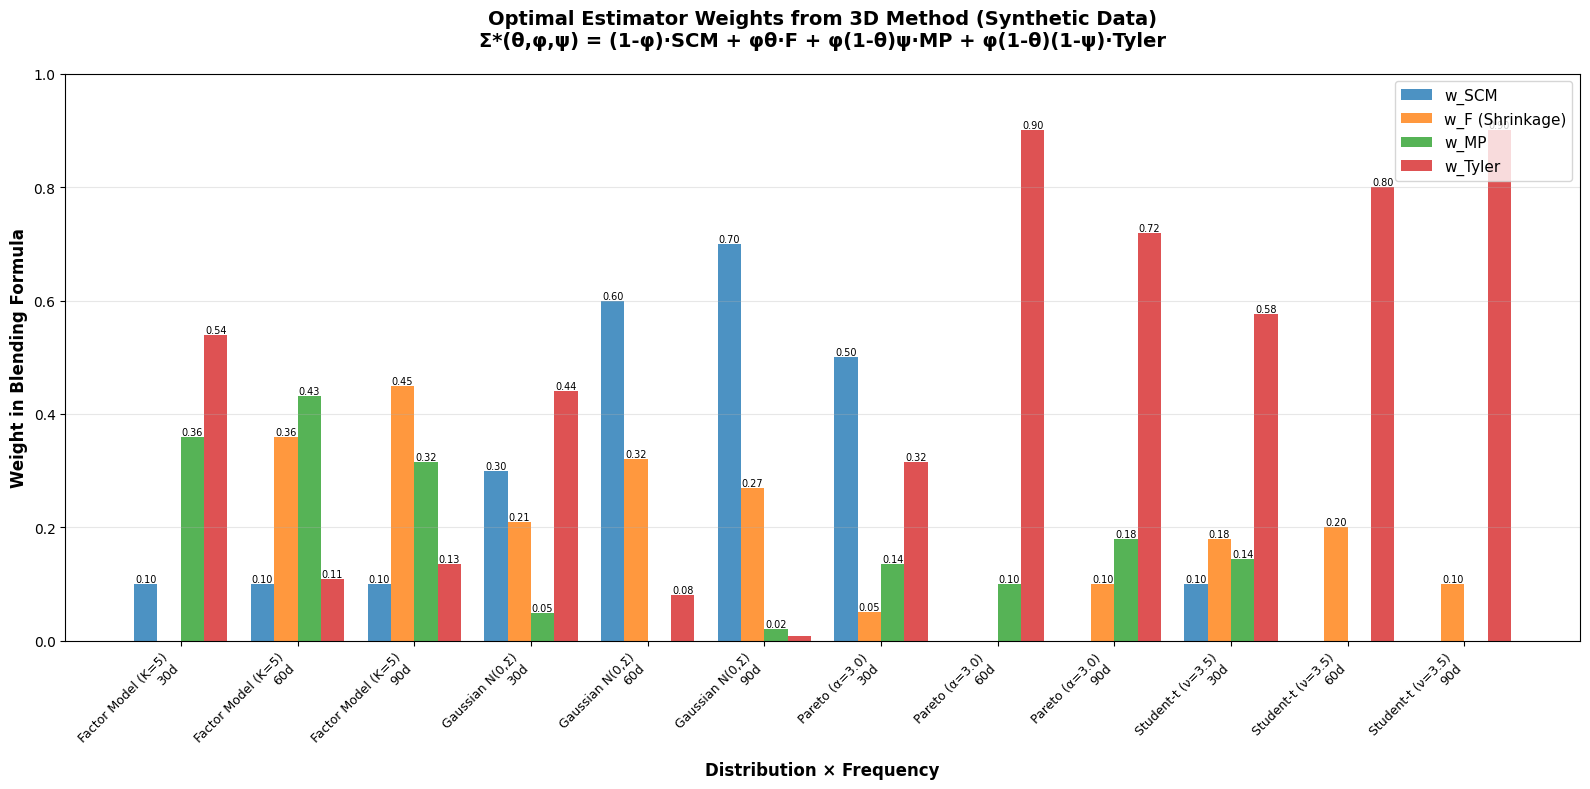


ESTIMATOR WEIGHTS TABLE (SYNTHETIC DATA - Averaged Across Seeds)
      Distribution Frequency  w_SCM  w_F  w_MP  w_Tyler   θ   φ   ψ
Factor Model (K=5)       30d    0.1 0.00 0.360    0.540 0.0 0.9 0.4
Factor Model (K=5)       60d    0.1 0.36 0.432    0.108 0.4 0.9 0.8
Factor Model (K=5)       90d    0.1 0.45 0.315    0.135 0.5 0.9 0.7
   Gaussian N(0,Σ)       30d    0.3 0.21 0.049    0.441 0.3 0.7 0.1
   Gaussian N(0,Σ)       60d    0.6 0.32 0.000    0.080 0.8 0.4 0.0
   Gaussian N(0,Σ)       90d    0.7 0.27 0.021    0.009 0.9 0.3 0.7
    Pareto (α=3.0)       30d    0.5 0.05 0.135    0.315 0.1 0.5 0.3
    Pareto (α=3.0)       60d    0.0 0.00 0.100    0.900 0.0 1.0 0.1
    Pareto (α=3.0)       90d    0.0 0.10 0.180    0.720 0.1 1.0 0.2
 Student-t (ν=3.5)       30d    0.1 0.18 0.144    0.576 0.2 0.9 0.2
 Student-t (ν=3.5)       60d    0.0 0.20 0.000    0.800 0.2 1.0 0.0
 Student-t (ν=3.5)       90d    0.0 0.10 0.000    0.900 0.1 1.0 0.0

Note: w_SCM + w_F + w_MP + w_Tyler = 1.0 for each

In [44]:
synthetic_weights_df = synthetic_plot_estimator_weights(synthetic_all_results, save_path='synthetic_estimator_weights.png')